In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import numpy as np
from collections import Counter
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("/content/Iris.csv")

df.drop('Id', axis=1, inplace=True)
X = df.iloc[:, :-1].values  # All columns except the last one
Y = df.iloc[:, -1].values   # The last column
# Encode labels if they are categorical (optional)

le = LabelEncoder()
Y = le.fit_transform(Y)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [3]:
#SVM
model = SVC(kernel='linear')
model.fit(X_train, Y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)
print(y_pred)
# print(Y_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

[1 2 2 1 0 1 2 1 0 2 1 1 2 0 0 2 2 2 1 1 0 2 2 0 2 2 1 0 0 1]
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


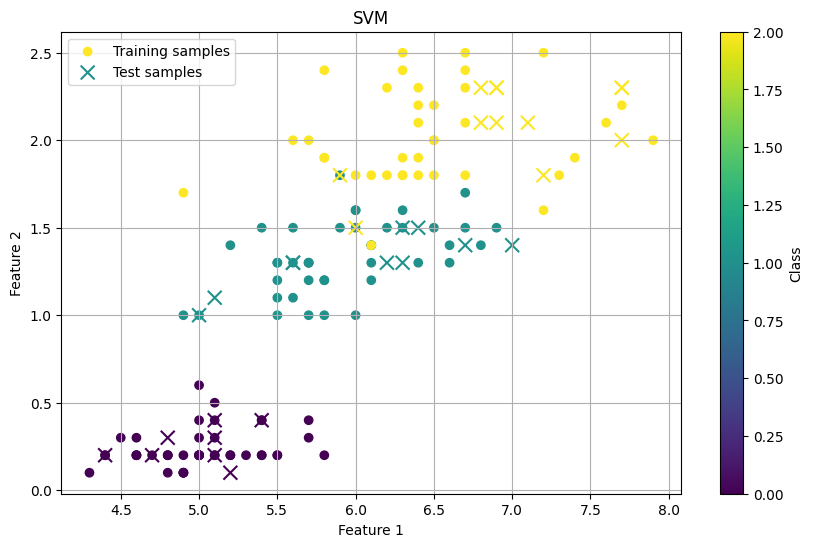

Accuracy: 0.97


In [4]:
plt.figure(figsize=(10, 6))

# Plot training data points
plt.scatter(X_train[:, 0], X_train[:, 3], c=Y_train, cmap='viridis', marker='o', label='Training samples')

# Plot test data points
plt.scatter(X_test[:, 0], X_test[:, 3], c=y_pred, cmap='viridis', marker='x', s=100, label='Test samples')


plt.title('SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.colorbar(label='Class')
plt.show()
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [5]:
#KNN

def euclidean_distance(x1, x2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(np.sum((x1 - x2) ** 2))

def calculate_distances(X_train, test_point):
    """Calculate the distances from the test point to all training points."""
    return np.array([euclidean_distance(test_point, x_train_sample) for x_train_sample in X_train])

def get_k_nearest_neighbors(distances, k):
    """Get the indices of the k-nearest neighbors."""
    return distances.argsort()[:k]

def majority_vote(neighbors_labels):
    """Determine the most common label among the neighbors."""
    return Counter(neighbors_labels).most_common(1)[0][0]

def knn(X_train, y_train, X_test, k=3):
    """KNN algorithm to predict the class for each point in X_test."""
    y_pred = np.empty(X_test.shape[0], dtype=y_train.dtype)

    for i, test_point in enumerate(X_test):
        distances = calculate_distances(X_train, test_point)
        k_indices = get_k_nearest_neighbors(distances, k)
        k_nearest_labels = y_train[k_indices]
        y_pred[i] = majority_vote(k_nearest_labels)

    return y_pred

In [6]:
k = 15
K_pred = knn(X_train, Y_train, X_test, k)
print(K_pred)

[1 2 2 1 0 1 2 1 0 2 1 1 2 0 0 2 2 2 1 1 0 2 2 0 2 2 1 0 0 2]


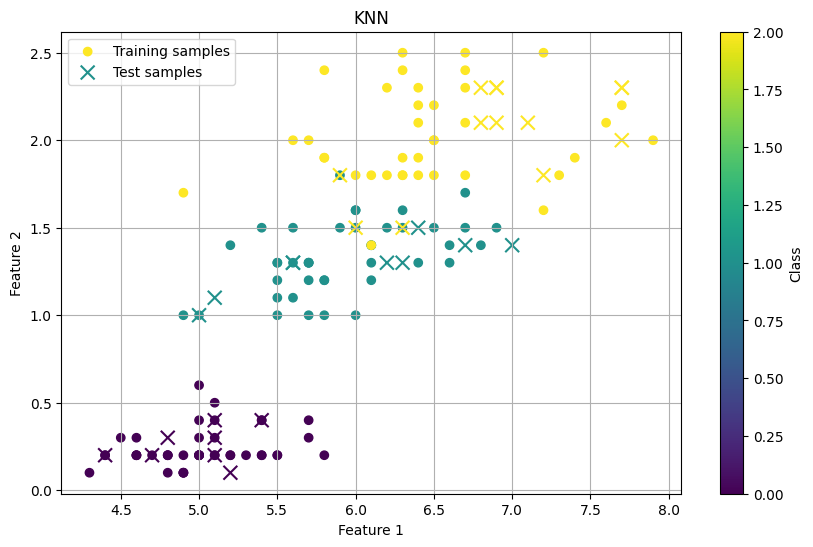

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [7]:
plt.figure(figsize=(10, 6))

# Plot training data points
plt.scatter(X_train[:, 0], X_train[:, 3], c=Y_train, cmap='viridis', marker='o', label='Training samples')

# Plot test data points
plt.scatter(X_test[:, 0], X_test[:, 3], c=K_pred, cmap='viridis', marker='x', s=100, label='Test samples')



plt.title('KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.colorbar(label='Class')
plt.show()
accuracy = accuracy_score(Y_test, K_pred)
precision = precision_score(Y_test, K_pred, average='weighted')
recall = recall_score(Y_test, K_pred, average='weighted')
f1 = f1_score(Y_test, K_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
